## Pratham Ramkripal Yadav 1017895120
## Jenil Sanjaykumar Pandya 1017921730


#### This code segment imports essential libraries for image processing and machine learning tasks. It includes libraries like OpenCV (cv2) for image manipulation, TensorFlow for building and training neural networks, and others for data manipulation and visualization. Additionally, it imports specific components from TensorFlow, such as layers and models, for constructing neural network architectures efficiently. Finally, it imports a function from scikit-learn to split data into training and testing sets, facilitating model evaluation and validation.

In [81]:
# Import necessary libraries
import os  # For interacting with the operating system
import cv2  # For image processing
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import tensorflow as tf  # For building and training neural networks
from tensorflow.keras import layers, models  # Specific TensorFlow components for building models
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets


#### This function takes a folder path and a target size as input parameters. It iterates through each file in the specified folder, reads the image using OpenCV, resizes it to the target size, and appends the resized image to a list. Finally, it returns the list of resized images as a NumPy array. This function is useful for preparing image data for machine learning tasks, such as training convolutional neural networks (CNNs), where input images need to be of consistent dimensions.

In [82]:
# Define a function to ingest images from a specified folder path and resize them to a target size
def ingest_image(folder_path, target_size):
    image_data = []  # Initialize an empty list to store resized images
    # Iterate through each file in the folder
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)  # Construct the full path of the image
        image = cv2.imread(image_path)  # Read the image using OpenCV
        # Resize the image to the target size
        resized_image = cv2.resize(image, target_size)
        image_data.append(resized_image)  # Append the resized image to the list
    return np.array(image_data)  # Return the list of resized images as a NumPy array


In [58]:
# # List of painter names
Painter_Name = {
    1: 'Alfred Sisley',
    2: 'Amedeo Modigliani',
    3: 'Edgar Degas',
    4: 'Pablo Picasso',
    5: 'Paul Gaugin',
    6: 'Pierre Auguste Renoir',
    7: 'Rembrandt',
    8: 'Rene Magritte',
    9: 'Titian',
    10: 'Vincent van Gogh'
}

#### This code segment iterates over a dictionary containing label-folder path pairs. For each label-folder path pair, it calls the ingest_image() function to resize images from the specified folder path to the target size. It then extends the X_data list with the resized images and extends the y_data list with the corresponding label repeated for each image. This process effectively prepares the image data and labels for subsequent machine learning tasks, such as training a classification model.

In [59]:
# Define folder paths and target size
folder_paths = {
    1: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Alfred_Sisley",
    2: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Amedeo_Modigliani",
    3: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Edgar_Degas",
    4: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Pablo_Picasso",
    5: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Paul_Gauguin",
    6: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Pierre_Auguste_Renoir",
    7: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Rembrandt",
    8: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Rene_Magritte",
    9: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Titian",
    10: "C:/Udayton/Spring 2024/584 - AIDL/HW3/Train/Vincent_van_Gogh",
}

target_size = (150, 150)

# Ingest images and labels
X_data = []
y_data = []
for label, folder_path in folder_paths.items():
    images = ingest_image(folder_path, target_size)
    X_data.extend(images)
    y_data.extend([label] * len(images))

#### This code segment converts the lists containing image data and corresponding labels into NumPy arrays using the np.array() function. Converting the data to NumPy arrays enables efficient manipulation and processing, which is essential for training machine learning models using libraries like TensorFlow.

In [83]:
# Convert the lists of image data and labels to NumPy arrays
X_data = np.array(X_data)  # Convert the list of resized images to a NumPy array
y_data = np.array(y_data)  # Convert the list of labels to a NumPy array

#### This code snippet first splits the data into training and testing sets using the train_test_split() function from scikit-learn, ensuring that the class distribution is maintained (stratified splitting). Then, it normalizes the pixel values of the images to the range [0, 1], which is a common preprocessing step in deep learning. Finally, it reshapes the input data to have the correct dimensions expected by convolutional neural networks (CNNs), ensuring compatibility with the network architecture.

In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42, stratify=y_data)

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape input data to have the correct dimensions for CNN
X_train = X_train.reshape(-1, target_size[0], target_size[1], 3)
X_test = X_test.reshape(-1, target_size[0], target_size[1], 3)

#### This code segment defines the architecture of a convolutional neural network (CNN) using TensorFlow's Sequential model. It consists of several convolutional layers with increasing numbers of filters followed by max-pooling layers to downsample the feature maps. After the convolutional layers, the feature maps are flattened and passed through dense (fully connected) layers with ReLU activation functions. The output layer consists of units equal to the number of classes in the dataset, using softmax activation for multi-class classification. Additionally, it sets up a TensorBoard callback to visualize training progress and model performance.

In [120]:
# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'), 
    layers.Dense(32, activation='relu'),
    layers.Dense(len(folder_paths), activation='softmax')  # Output layer with number of classes
])

tb_callback=tf.keras.callbacks.TensorBoard(log_dir='logs/',histogram_freq=1)

#### This code snippet imports the Adam optimizer from the Keras library, which is a popular choice for training neural networks due to its adaptive learning rate method. The model is compiled using the Adam optimizer, sparse categorical crossentropy loss function (suitable for multi-class classification problems with integer labels), and accuracy as the evaluation metric to monitor during training. This compilation step prepares the model for training by configuring its learning process.







In [121]:
# from keras.optimizers import Adam

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [64]:
# # Subtract 1 from label values to ensure they start from 0
y_train = y_train - 1
y_test = y_test - 1

#### This code segment trains the defined model using the training data (X_train, y_train) for 20 epochs with a batch size of 64. During training, it validates the model's performance on the testing data (X_test, y_test). Additionally, it includes a TensorBoard callback to visualize the training process and monitor metrics such as loss and accuracy. The training history containing metrics for each epoch is stored in the history variable for further analysis and visualization.

In [122]:
# Train the model
history = model.fit(X_train, y_train, epochs=10 , batch_size=64, validation_data=(X_test, y_test)
                    ,callbacks=[tb_callback]
                   )

Epoch 1/10
14/14 [==============================] - 9s 557ms/step - loss: 2.3159 - accuracy: 0.1114 - val_loss: 2.2632 - val_accuracy: 0.1318
Epoch 2/10
14/14 [==============================] - 7s 518ms/step - loss: 2.2245 - accuracy: 0.1682 - val_loss: 2.1548 - val_accuracy: 0.2409
Epoch 3/10
14/14 [==============================] - 7s 531ms/step - loss: 2.0861 - accuracy: 0.2432 - val_loss: 2.0506 - val_accuracy: 0.2091
Epoch 4/10
14/14 [==============================] - 7s 519ms/step - loss: 1.8707 - accuracy: 0.2989 - val_loss: 2.0405 - val_accuracy: 0.2409
Epoch 5/10
14/14 [==============================] - 7s 530ms/step - loss: 1.7030 - accuracy: 0.3466 - val_loss: 1.8801 - val_accuracy: 0.2864
Epoch 6/10
14/14 [==============================] - 7s 536ms/step - loss: 1.4695 - accuracy: 0.4761 - val_loss: 1.9974 - val_accuracy: 0.3500
Epoch 7/10
14/14 [==============================] - 7s 523ms/step - loss: 1.3246 - accuracy: 0.5375 - val_loss: 1.7992 - val_accuracy: 0.4136
Epoch 

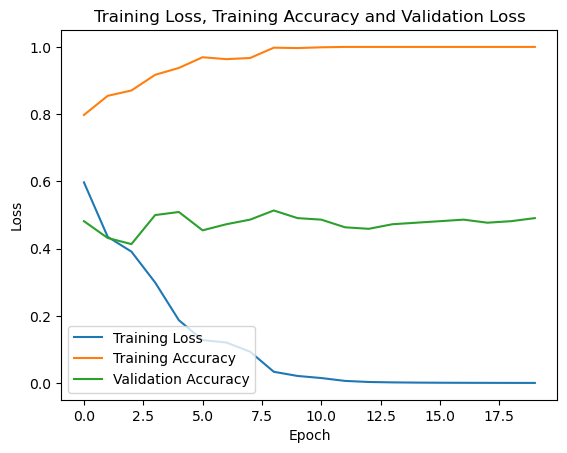

In [95]:
# Get training and validation loss from the history object
train_loss = history.history['loss']
#val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plotting the loss
plt.plot(train_loss, label='Training Loss')
#plt.plot(val_loss, label='Validation Loss')
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training Loss, Training Accuracy and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [74]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

# Make predictions
predictions = model.predict(X_test)

7/7 [==============================] - 0s 58ms/step - loss: 1.9336 - accuracy: 0.4136
Test accuracy: 0.41363635659217834
7/7 [==============================] - 0s 59ms/step


#### This code segment defines the folder path where the testing data is located and then ingests the testing images from that folder, resizing them to the target size required by the model. It then normalizes the pixel values of the testing images to the range [0, 1] and reshapes them to match the input dimensions expected by the convolutional neural network (CNN). Next, it utilizes the trained model to make predictions on the testing images, obtaining class probabilities for each image. These probabilities are converted into class labels by selecting the index with the highest probability. Finally, it maps the predicted label indices to the corresponding painter names for interpretation and analysis.

In [77]:
# Define the folder path for testing data
testing_folder_path = "C:/Udayton/Spring 2024/584 - AIDL/HW3/Validation"

# Ingest the testing images
X_test_validation = ingest_image(testing_folder_path, target_size)

# Normalize pixel values to range [0, 1] and reshape for CNN
X_test_validation = X_test_validation.astype('float32') / 255.0
X_test_validation = X_test_validation.reshape(-1, target_size[0], target_size[1], 3)

# Make predictions using the trained model
predictions = model.predict(X_test_validation)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted label indices to painter names
predicted_painter_names = [Painter_Name[label + 1] for label in predicted_labels]  # Add 1 to map back to original labels

1/1 [==============================] - 0s 44ms/step


#### This code segment plots the testing images along with their predicted painter names using Matplotlib. It iterates over each testing image, displays it in a subplot, sets the title as the predicted painter name, and turns off axis ticks and labels for better visualization. Finally, it shows the plot containing the images and predicted labels.

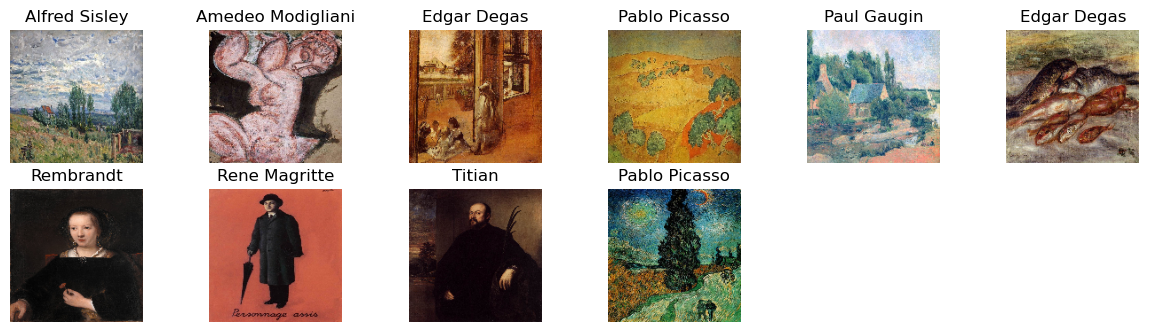

In [87]:
# Plot the images along with predicted painter names
plt.figure(figsize=(15, 10))
for i in range(len(X_test_validation)):
    plt.subplot(5, 6, i + 1)
    plt.imshow(cv2.cvtColor(X_test_validation[i], cv2.COLOR_BGR2RGB))
    plt.title(predicted_painter_names[i])
    plt.axis('off')
plt.show()